In [2]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
path = os.path.join('C:\\Users\\ysman\\OneDrive\\Desktop\\project_data\\BIOGRID-ORGANISM-Arabidopsis_thaliana_Columbia-3.5.181.tab2.txt')
bioGRID_file = open(path, "r") 
testFile = open(os.path.join('C:\\Users\\ysman\\OneDrive\\Desktop\\project_directory\\data\\test.txt'), 'r')
bioGRID_DF = pd.read_csv(bioGRID_file, sep = '\t')
testFile_DF = pd.read_csv(testFile, sep = '\t')
'''
Another way to import the data without os.path.join:

df = pd.read_csv("../../project_data/BIOGRID-ORGANISM-Arabidopsis_thaliana_Columbia-3.5.181.tab2.txt", sep = '\t')
'''

'\nAnother way to import the data without os.path.join:\n\ndf = pd.read_csv("../../project_data/BIOGRID-ORGANISM-Arabidopsis_thaliana_Columbia-3.5.181.tab2.txt", sep = \'\t\')\n'


### Interaction File Column Definitions
* **BioGRID Interaction ID:** A unique identifier for each interaction within the BioGRID database. Can be used to link to BioGRID interaction pages. For example: http://thebiogrid.org/interaction/616539
* **Entrez Gene ID for Interactor A:** The identifier from the Entrez-Gene database that corresponds to Interactor A. If no Entrez Gene ID is available, this will be a “-”.
* **Entrez Gene ID for Interactor B:** Same structure as column 2.
* **BioGRID ID for Interactor A:** The identifier in the BioGRID database that corresponds to Interactor A. These identifiers are best used for creating links to the BioGRID from your own websites or applications. To link to a page within our site, simply append the URL: http://thebiogrid.org/ID/ to each ID. For example, http://thebiogrid.org/31623/.
* **BioGRID ID for Interactor B:** Same structure as column 4.
* **Systematic name for Interactor A:** A plain text systematic name if known for interactor A. Will be a “-” if no name is available.
* **Systematic name for Interactor B:** Same structure as column 6.
* **Official symbol for Interactor A:** A common gene name/official symbol for interactor A. Will be a “-” if no name is available.
* **Official symbol for Interactor B:** Same structure as column 8.
* **Synonyms/Aliases for Interactor A:** A “|” separated list of alternate identifiers for interactor A. Will be “-” if no aliases are available.
* **Synonyms/Aliases for Interactor B:** Same stucture as column 10.
* **Experimental System Name:** One of the many Experimental Evidence Codes supported by the BioGRID.
* **Experimental System Type:** This will be either “physical” or “genetic” as a classification of the Experimental System Name.
* **Author:** First author surname of the publication in which the interaction has been shown, optionally followed by additional indicators, e.g. Stephenson A (2005)
* **Pubmed ID:** Pubmed ID of the publication in which the interaction has been shown.
* **Organism ID for Interactor A:** This is the NCBI Taxonomy ID for Interactor A.
* **Organism ID for Interactor B:** Same structure as 16.
* **Interaction Throughput:** This will be either High Throughput, Low Throughput or Both (separated by “|”).
* **Quantitative Score:** This will be a positive for negative value recorded by the original publication depicting P-Values, Confidence Score, SGA Score, etc. Will be “-” if no score is reported.
* **Post Translational Modification:** For any Biochemical Activity experiments, this field will be filled with the associated post translational modification. Will be “-” if no modification is reported.
* **Phenotypes:** If any phenotype info is recorded, it will be provided here separated by “|”. Each phenotype will be of the format <phenotype>[<phenotype qualifier>]:<phenotype type>. Note that the phenotype types and qualifiers are optional and will only be present where recorded. Phenotypes may also have multiple qualifiers in which case unique qualifiers will be separated by carat (^). If no phenotype information is available, this field will contain “-”.  
* **Qualifications:** If additional plain text information was recorded for an interaction, it will be listed with unique qualifiers separated by “|”. If no qualification is available, this field will contain “-”.
* **Tags:** If an interaction has been tagged with additional classifications, they will be provided in this column separated by “|”. If no tag information is available, this field will contain “-”.
* **Source Database:** This field will contain the name of the database in which this interaction was provided.

In [4]:
print(bioGRID_DF.columns)
print(bioGRID_DF.dtypes)
bioGRID_DF.head()

Index(['#BioGRID Interaction ID', 'Entrez Gene Interactor A',
       'Entrez Gene Interactor B', 'BioGRID ID Interactor A',
       'BioGRID ID Interactor B', 'Systematic Name Interactor A',
       'Systematic Name Interactor B', 'Official Symbol Interactor A',
       'Official Symbol Interactor B', 'Synonyms Interactor A',
       'Synonyms Interactor B', 'Experimental System',
       'Experimental System Type', 'Author', 'Pubmed ID',
       'Organism Interactor A', 'Organism Interactor B', 'Throughput', 'Score',
       'Modification', 'Phenotypes', 'Qualifications', 'Tags',
       'Source Database'],
      dtype='object')
#BioGRID Interaction ID          int64
Entrez Gene Interactor A         int64
Entrez Gene Interactor B         int64
BioGRID ID Interactor A          int64
BioGRID ID Interactor B          int64
Systematic Name Interactor A    object
Systematic Name Interactor B    object
Official Symbol Interactor A    object
Official Symbol Interactor B    object
Synonyms Interactor

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,Pubmed ID,Organism Interactor A,Organism Interactor B,Throughput,Score,Modification,Phenotypes,Qualifications,Tags,Source Database
0,251838,828230,832208,13519,17483,AT4G00020,AT5G20850,BRCA2(IV),RAD51,BRCA2A|BREAST CANCER 2 like 2A|EDA20|EMBRYO SA...,...,15014444,3702,3702,Low Throughput,-,-,-,-,-,BIOGRID
1,251839,828230,821860,13519,7192,AT4G00020,AT3G22880,BRCA2(IV),DMC1,BRCA2A|BREAST CANCER 2 like 2A|EDA20|EMBRYO SA...,...,15014444,3702,3702,Low Throughput,-,-,-,-,-,BIOGRID
2,265014,836259,818903,21503,4240,AT5G61380,AT2G43010,TOC1,PIF4,APRR1|AtTOC1|MFB13.13|MFB13_13|PRR1|PSEUDO-RES...,...,14634162,3702,3702,Low Throughput,-,-,-,-,-,BIOGRID
3,265015,836259,825075,21503,10390,AT5G61380,AT3G59060,TOC1,PIL6,APRR1|AtTOC1|MFB13.13|MFB13_13|PRR1|PSEUDO-RES...,...,14634162,3702,3702,Low Throughput,-,-,-,-,-,BIOGRID
4,265016,836259,836259,21503,21503,AT5G61380,AT5G61380,TOC1,TOC1,APRR1|AtTOC1|MFB13.13|MFB13_13|PRR1|PSEUDO-RES...,...,14634162,3702,3702,Low Throughput,-,-,-,-,-,BIOGRID


In [5]:
OrganismTypesA = list(bioGRID_DF['Organism Interactor A'].unique())
OrganismTypesB = list(bioGRID_DF['Organism Interactor B'].unique())
OrganismTypesA.sort()
OrganismTypesB.sort()
OrganismTypes = list(set([*OrganismTypesA, *OrganismTypesB]))
OrganismTypes.sort()

In [6]:
print(OrganismTypes)
print(OrganismTypesA)
print(OrganismTypesB)

[3055, 3702, 3847, 4081, 4098, 4577, 9606, 9823, 9913, 10090, 10116, 10298, 12242, 39947, 284812, 316407, 559292]
[3702, 4081, 4098, 4577, 9606, 9823, 9913, 10090, 10116, 12242, 39947, 316407, 559292]
[3055, 3702, 3847, 4577, 9606, 9913, 10090, 10116, 10298, 12242, 39947, 284812, 316407, 559292]


In [7]:
'''
From https://www.ncbi.nlm.nih.gov/Taxonomy/TaxIdentifier/tax_identifier.cgi
The "tax_report.txt" file tells us what organism each gene is from.
'''
organismIDs = pd.read_csv('../../project_data/tax_report.txt', sep = '\t')
organismIDs.drop(columns = ['|','|.1','|.2', 'code', 'primary taxid'],inplace = True)
organismIDs # we know 3702 is Arabidopsis

,taxid,taxname
0,3055,Chlamydomonas reinhardtii
1,3702,Arabidopsis thaliana
2,3847,Glycine max
3,4081,Solanum lycopersicum
4,4098,Nicotiana tomentosiformis
5,4577,Zea mays
6,9606,Homo sapiens
7,9823,Sus scrofa
8,9913,Bos taurus
9,10090,Mus musculus


In [8]:
mask1 = bioGRID_DF['Organism Interactor A'] == 3702
mask2 = bioGRID_DF['Organism Interactor B'] == 3702
onlyArabDF = bioGRID_DF[mask1& mask2]
oneArabDF = bioGRID_DF[~mask1|~mask2]
noArabDF = bioGRID_DF[~mask1 & ~mask2]

In [9]:
print('There are {} interactions in the total database.'.format(bioGRID_DF.shape[0]))
print('There are {} interactions of just Arabidopsis: Arabidopsis in the database.'.format(onlyArabDF.shape[0]))
print('There are {} interactions of Arabidopsis: Other.'.format(oneArabDF.shape[0]))
print('There are {} interactions that don\'t involve Arabidopsis.'.format(noArabDF.shape[0]))

There are 56198 interactions in the total database.
There are 55814 interactions of just Arabidopsis: Arabidopsis in the database.
There are 384 interactions of Arabidopsis: Other.
There are 0 interactions that don't involve Arabidopsis.


In [10]:
#get list of genes so I can import the necessary ATTED Data. Note that the ATTED data has a text file by Entrez gene ID
#WholeData:
wholeGenesA = list(bioGRID_DF['Entrez Gene Interactor A'].unique())
wholeGenesB = list(bioGRID_DF['Entrez Gene Interactor B'].unique())
wholeGenesA.sort()
wholeGenesB.sort()
wholeGenes = list(set([*wholeGenesA, *wholeGenesB]))
wholeGenes.sort()
len(wholeGenes)

10550

In [11]:
ArabGenesA = list(onlyArabDF['Entrez Gene Interactor A'].unique())
ArabGenesB = list(onlyArabDF['Entrez Gene Interactor B'].unique())
ArabGenesA.sort()
ArabGenesB.sort()
ArabGenes = list(set([*ArabGenesA, *ArabGenesB]))
ArabGenes.sort()
len(ArabGenes)

10367

In [12]:
attedpath = 'C:\\Users\\ysman\\OneDrive\\Desktop\\project_data\\Ath-mB.v17-08.G20819-S16033.rma_combat.mrgeo.d\\'
os.path.exists(attedpath+'{}'.format(814630))

True

In [13]:
overlapGenes = []
for i in range (len(wholeGenes)):
    if os.path.exists(attedpath+'{}'.format(wholeGenes[i])):
        overlapGenes.append(wholeGenes[i])
len(overlapGenes)

8781

In [14]:
atted = pd.read_csv('../../project_data/Ath-mB.v17-08.G20819-S16033.rma_combat.mrgeo.d/814630', sep = '\t', header = None)
atted = atted.sort_values(by = 0)
atted.head()
alist = list(atted[1])

atted2 = pd.read_csv('../../project_data/Ath-mB.v17-08.G20819-S16033.rma_combat.mrgeo.d/814646', sep = '\t', header = None)
atted2 = atted2.sort_values(by = 0)
atted2.head()
alist2 = list(atted[1])
a2= np.array(atted2[0])
a1 = np.array(atted[0])
attedGenes = list(a1)
a1 == a2

array([ True,  True,  True, ...,  True,  True,  True])

In [89]:
type(alist2[1])

float

In [53]:
len(a2)

20819

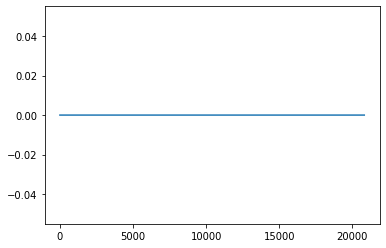

In [58]:
plt.plot(a1-a2)

In [188]:
%%time
#import time
#start = time.time()
DF = {0:attedGenes}

for x in overlapGenes:
    tempAtted = pd.read_csv('../../project_data/Ath-mB.v17-08.G20819-S16033.rma_combat.mrgeo.d/{}'.format(x), sep = '\t', header= None)
    tempAtted = tempAtted.sort_values(by = 0)
    templist = list(tempAtted[1])
    DF.update({x:templist})

attedData = pd.DataFrame(DF,dtype='float64')
attedData.tail()
#end = time.time()
#print(end-start)

Wall time: 5min 28s


,0,814630,814637,814641,814643,814644,814646,814647,814649,814651,...,3767983,3768737,3768753,3768908,3769417,3769951,3770075,3770503,5008312,6241019
20814,7922380.0,3934.08,12540.97,631.42,3311.72,8173.86,18625.17,17939.69,2042.43,19472.06,...,16117.16,12212.44,7757.54,14924.08,2674.36,14268.04,12174.93,8428.76,962.87,10439.77
20815,7922387.0,14314.08,15917.68,17139.09,18110.16,16954.06,8598.57,8939.66,12155.66,456.49,...,258.32,2848.27,4106.48,691.14,20064.94,1804.25,12479.29,929.73,17930.25,15104.44
20816,7922407.0,7890.92,1697.09,2597.53,7402.64,7025.40,17176.15,16085.99,972.40,8908.89,...,11486.99,7985.50,6907.14,11772.55,1285.76,10178.05,20682.05,13692.40,6124.12,20691.11
20817,7922469.0,3637.87,18218.43,18409.24,19299.30,20135.36,938.07,5015.22,19254.29,5014.64,...,4526.38,9325.28,11860.94,4249.88,16130.56,5913.48,658.74,6906.02,11975.51,8548.29
20818,7922506.0,17100.19,18214.14,13952.84,17175.50,11877.87,4836.40,8935.94,12837.32,1197.25,...,4172.76,4542.78,5018.40,6635.07,15539.78,2243.20,5922.10,4366.72,14237.20,10984.32


In [189]:
attedData.describe()

KeyboardInterrupt: 

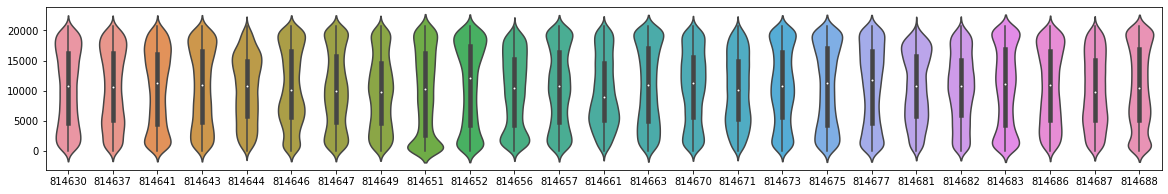

In [210]:
import seaborn as sns
#ax = sns.violinplot(data = attedData[[814630,814637,814641,814643,814646]])
vioColnames= list(attedData.columns)
vioColnames = vioColnames[1:]
vioColnames
ax = plt.figure(figsize = (20,3))
ax =sns.violinplot(data = attedData[vioColnames[:25]])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


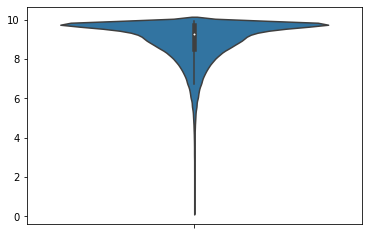

In [194]:
logATTEDdata = np.log(attedData[[814630,814637,814641,814643,814646]])
loglist = [814630,814637,814641,814643,814646]
logDF = {}
for x in loglist: 
    logDF.update({x:list(logATTEDdata[logATTEDdata[x]!=-np.inf][x])})
logATTED = pd.DataFrame(logDF)
ax1 = sns.violinplot(logATTED, orient ='v')
#sns.violinplot(logATTEDdata[logATTEDdata[814637]!=-np.inf][814637],orient ='v')

In [192]:
logATTEDdata.tail()

,814630,814637,814641,814643,814646
20814,8.277432,9.436756,6.447971,8.105223,9.832269
20815,9.568999,9.675186,9.749117,9.804228,9.059351
20816,8.973468,7.436670,7.862316,8.909592,9.751277
20817,8.199154,9.810189,9.820608,9.867824,6.843825
20818,9.746845,9.809953,9.543438,9.751239,8.483926


In [94]:
attedData.dtypes

0          float64
814630     float64
814637     float64
814641     float64
814643     float64
814644     float64
814646     float64
814647     float64
814649     float64
814651     float64
814652     float64
814656     float64
814657     float64
814661     float64
814663     float64
814670     float64
814671     float64
814673     float64
814675     float64
814677     float64
814681     float64
814682     float64
814683     float64
814686     float64
814687     float64
814688     float64
814691     float64
814694     float64
814695     float64
814697     float64
            ...   
844398     float64
844403     float64
844405     float64
844406     float64
844411     float64
844412     float64
844415     float64
844417     float64
844422     float64
844423     float64
844430     float64
844431     float64
844433     float64
2745844    float64
2745879    float64
3767664    float64
3767728    float64
3767798    float64
3767954    float64
3767968    float64
3767983    float64
3768737    f

In [109]:
tempDF = attedData

In [110]:
tempDF.loc[30000] = tempDF.sum()

In [113]:
tempDF =tempDF.astype({0: 'int32'})
tempDF.tail()


,0,814630,814637,814641,814643,814644,814646,814647,814649,814651,...,3767983,3768737,3768753,3768908,3769417,3769951,3770075,3770503,5008312,6241019
20815,7922387,1.431408e+04,1.591768e+04,1.713909e+04,1.811016e+04,1.695406e+04,8.598570e+03,8.939660e+03,1.215566e+04,4.564900e+02,...,2.583200e+02,2.848270e+03,4.106480e+03,6.911400e+02,2.006494e+04,1.804250e+03,1.247929e+04,9.297300e+02,1.793025e+04,1.510444e+04
20816,7922407,7.890920e+03,1.697090e+03,2.597530e+03,7.402640e+03,7.025400e+03,1.717615e+04,1.608599e+04,9.724000e+02,8.908890e+03,...,1.148699e+04,7.985500e+03,6.907140e+03,1.177255e+04,1.285760e+03,1.017805e+04,2.068205e+04,1.369240e+04,6.124120e+03,2.069111e+04
20817,7922469,3.637870e+03,1.821843e+04,1.840924e+04,1.929930e+04,2.013536e+04,9.380700e+02,5.015220e+03,1.925429e+04,5.014640e+03,...,4.526380e+03,9.325280e+03,1.186094e+04,4.249880e+03,1.613056e+04,5.913480e+03,6.587400e+02,6.906020e+03,1.197551e+04,8.548290e+03
20818,7922506,1.710019e+04,1.821414e+04,1.395284e+04,1.717550e+04,1.187787e+04,4.836400e+03,8.935940e+03,1.283732e+04,1.197250e+03,...,4.172760e+03,4.542780e+03,5.018400e+03,6.635070e+03,1.553978e+04,2.243200e+03,5.922100e+03,4.366720e+03,1.423720e+04,1.098432e+04
30000,-2147483648,4.342382e+08,4.391970e+08,4.352718e+08,4.454956e+08,4.318318e+08,4.460759e+08,4.258990e+08,4.103562e+08,4.102645e+08,...,4.020356e+08,4.093632e+08,4.028243e+08,4.126197e+08,4.407837e+08,4.109276e+08,4.522674e+08,3.978635e+08,4.315520e+08,4.419994e+08


In [17]:
simplebGRID = bioGRID_DF[['Entrez Gene Interactor A','Entrez Gene Interactor B']]
simplebGRID

,Entrez Gene Interactor A,Entrez Gene Interactor B
0,828230,832208
1,828230,821860
2,836259,818903
3,836259,825075
4,836259,836259
5,836259,819292
6,819292,819292
7,819292,836259
8,834224,816408
9,817111,816408


   weight  0  b
0     0.3  A  D
1     0.3  B  A
2     0.3  C  A


{('A', 'D'): 0.3, ('A', 'B'): 0.3, ('A', 'C'): 0.3}

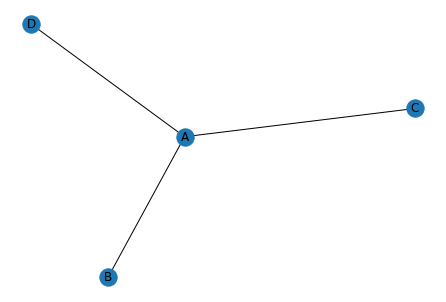

In [150]:
rng = np.random.RandomState(seed=5)
ints = [.3,.3,.3]
a = ['A', 'B', 'C']
b = ['D', 'A', 'A']
c= [7,1,1]
df = pd.DataFrame({'weight':ints})
df[0] = a
df['b'] = b
print(df[['weight',  0, 'b']])
testG = nx.from_pandas_edgelist(df, 0, 'b', ['weight'])
nx.draw(testG, with_labels =True )
nx.get_edge_attributes(testG, 'weight')

In [151]:
nx.k_nearest_neighbors(testG, weight='weight')

{3: 1.0, 1: 3.0}

In [133]:
vsGRID = simplebGRID[:10]
GenesA = list(simplebGRID['Entrez Gene Interactor A'].unique())
GenesB = list(simplebGRID['Entrez Gene Interactor B'].unique())
GenesA.sort()
GenesB.sort()
Genes = list(set([*GenesA, *GenesB]))

In [127]:
%%time
G = nx.from_pandas_edgelist(simplebGRID, source = 'Entrez Gene Interactor A', target = 'Entrez Gene Interactor B')
#pos = nx.kamada_kawai_layout(G)
#nx.draw(G,pos, alpha = 0.3, node_size= 5)
#nx.draw_networkx_labels(G,pos,font_size = 7)
#G.get_edge_data(u =828230,v =832208)
print()


Wall time: 224 ms


In [22]:
degrees =[G.degree(gene) for gene in Genes]
print(Genes)
print(degrees)

[819200, 819203, 819204, 819206, 819208, 819210, 819211, 819212, 819215, 819217, 819219, 819220, 819223, 819230, 819232, 819233, 819234, 819235, 819236, 819237, 819239, 819240, 819241, 819242, 819244, 819247, 819248, 819249, 819252, 58, 819260, 819261, 852028, 819262, 819264, 819263, 819265, 819267, 819272, 819273, 819277, 819279, 819280, 819281, 819282, 3768403, 819283, 819286, 819290, 819292, 819293, 819295, 819296, 819300, 819302, 819303, 819311, 819312, 819313, 819314, 819316, 819317, 819318, 819320, 852088, 819321, 819322, 819323, 819326, 819329, 819330, 819332, 819334, 819335, 819339, 819340, 819352, 819353, 819356, 819358, 819359, 819360, 819364, 819371, 819372, 819373, 819374, 819375, 819376, 819383, 819384, 819386, 819387, 819389, 819392, 819393, 819396, 819397, 819399, 819400, 819401, 819402, 819403, 3768521, 819405, 819407, 819408, 819409, 819410, 819413, 819419, 819422, 819424, 819509, 3768663, 819549, 819550, 819551, 819553, 819554, 819555, 819558, 819561, 819562, 819565, 

In [120]:
cumMRR = tempDF.loc[30000]
cumMRR = cumMRR.drop(0)
sumMRR = list(cumMRR)


Text(0.5, 0, 'Rank')

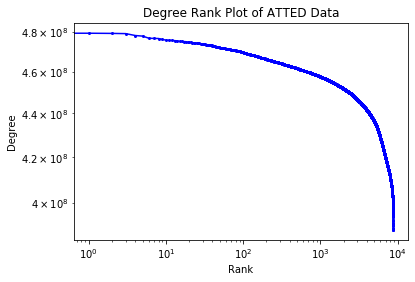

In [152]:
plt.loglog(sorted(sumMRR, reverse = True), 'b-', marker='o', markersize = 2)
plt.title("Degree Rank Plot of ATTED Data") 
plt.ylabel("Degree")
plt.xlabel("Rank")

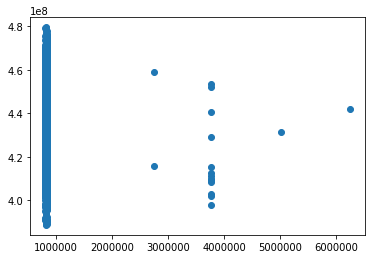

In [125]:
plt.scatter(overlapGenes,sumMRR)

Text(0.5, 0, 'Rank')

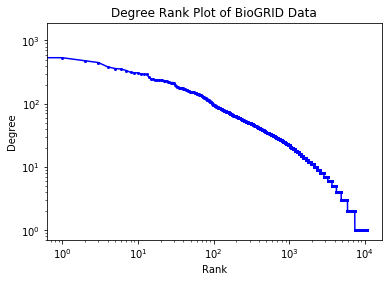

In [114]:
plt.loglog(sorted(degrees, reverse = True), 'b-', marker='o', markersize = 2)
plt.title("Degree Rank Plot of BioGRID Data") 
plt.ylabel("Degree")
plt.xlabel("Rank")

Wall time: 10min 46s


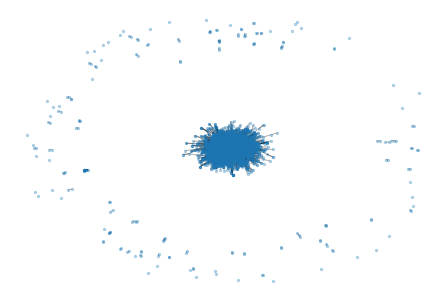

In [139]:
%%time
tG = nx.from_pandas_edgelist(vsGRID, source = 'Entrez Gene Interactor A', target = 'Entrez Gene Interactor B')
#pos = nx.kamada_kawai_layout(G)
nx.draw(G, alpha = 0.3, node_size= 5)
#nx.draw_networkx_labels(G,pos,font_size = 7)

Wall time: 10min 57s


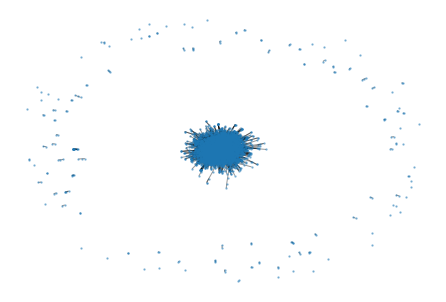

In [141]:
%%time
nx.draw(G, alpha=0.4, node_size=2)

In [129]:
# Example from Online
'''
G = nx.gnp_random_graph(100, 0.02)
#print(nx.write_edgelist(G))
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
# print "Degree sequence", degree_sequence
dmax = max(degree_sequence)
print(degree_sequence)
plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

plt.show()
'''

'\nG = nx.gnp_random_graph(100, 0.02)\n#print(nx.write_edgelist(G))\ndegree_sequence = sorted([d for n, d in G.degree()], reverse=True)\n# print "Degree sequence", degree_sequence\ndmax = max(degree_sequence)\nprint(degree_sequence)\nplt.loglog(degree_sequence, \'b-\', marker=\'o\')\nplt.title("Degree rank plot")\nplt.ylabel("degree")\nplt.xlabel("rank")\n\n# draw graph in inset\nplt.axes([0.45, 0.45, 0.45, 0.45])\nGcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])\npos = nx.spring_layout(Gcc)\nplt.axis(\'off\')\nnx.draw_networkx_nodes(Gcc, pos, node_size=20)\nnx.draw_networkx_edges(Gcc, pos, alpha=0.4)\n\nplt.show()\n'

# Glossary
---
open() : https://docs.python.org/3/library/functions.html#open  
os.path.join : https://www.geeksforgeeks.org/python-os-path-join-method/  
os.path.exits: https://www.geeksforgeeks.org/python-os-path-exists-method/  
../ takes you one level up  
../../ takes you two levels up  
~bool gives you opposite of the bool series: ~[F,F,T] is [T,T,F]

Sources:
https://github.com/yasirs/BioGRID-Nets/blob/master/getNets.py
https://github.com/idekerlab/tsri-lecture
https://www.slideshare.net/keiono/introduction-to-biological-network-analysis-and-visualization-with-cytoscape-part1

In [211]:
simplebGRID.head()

,Entrez Gene Interactor A,Entrez Gene Interactor B
0,828230,832208
1,828230,821860
2,836259,818903
3,836259,825075
4,836259,836259


In [1]:
a

NameError: name 'a' is not defined